# Sampling from a Biased Population
In this tutorial we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs. 

In [1]:
# Import the packages that we will be using for the tutorial
import numpy as np # for sampling for the distributions
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns

In [2]:
# Recreate the simulations from the video 
mean_uofm = 155 # mean weight of non-gym goers
sd_uofm = 5 # standard deviation of non-gym goers
mean_gym = 185 # mean values of gym goers
sd_gym = 5 # standard deviation of gym goers
gymperc = .3 # percentage of gym goers
totalPopSize = 40000 # Total population

In [5]:
# Create the two subgroups
uofm_students = np.random.normal(loc=mean_uofm, scale=sd_uofm, size=int(totalPopSize * (1-gymperc)))
students_at_gym = np.random.normal(loc=mean_gym, scale=sd_gym, size=int(totalPopSize * (gymperc)))

In [6]:
uofm_students

array([153.33330944, 148.35531996, 154.92681361, ..., 158.00323251,
       155.29699049, 158.92282343])

In [7]:
students_at_gym

array([186.27848079, 183.22175726, 184.42013318, ..., 185.73383857,
       184.94491828, 193.27514933])

In [8]:
# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)
population

array([153.33330944, 148.35531996, 154.92681361, ..., 185.73383857,
       184.94491828, 193.27514933])

### Plotting

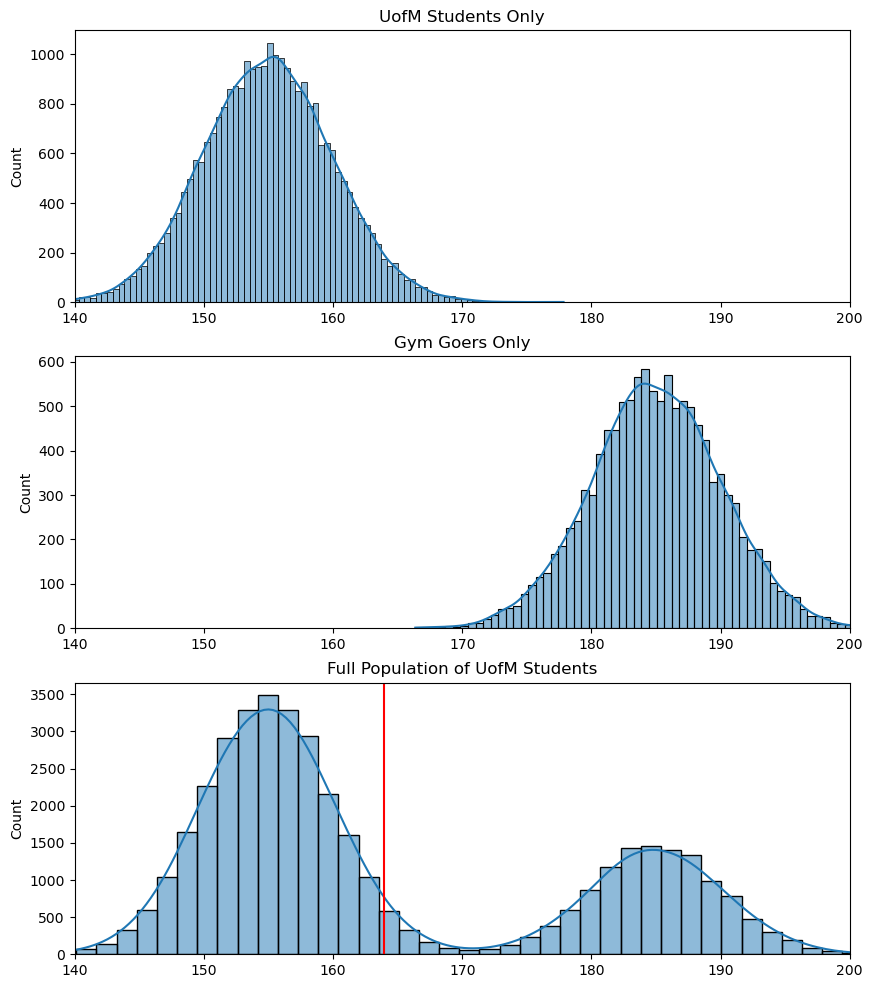

In [17]:
# Set up the figure for plotting
plt.figure(figsize=(10,12))

# Plot the uofm students only 
plt.subplot(3,1,1)
sns.histplot(uofm_students, kde=True)
plt.title('UofM Students Only')
plt.xlim([140, 200])

# Plot the Gym Goers only
plt.subplot(3,1,2)
sns.histplot(students_at_gym, kde=True)
plt.title('Gym Goers Only')
plt.xlim([140, 200])

# Plot bot groups together
plt.subplot(3,1,3)
sns.histplot(population, kde=True)
plt.title('Full Population of UofM Students')
plt.axvline(x=np.mean(population), color='r')
plt.xlim([140, 200])

plt.show()

# What Happens if We Sample from the Entire Population?
We will sample randomly from all students at the University of Michigan.

In [18]:
# Simulation parameters
sampSize = 50 # take random sample for 50 times from total population
numberSamps = 5000 # calculate the mean values of 50 random samples for 5000 times

In [22]:
# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
mean_distribution

array([ 6.91601221e-310,  6.91601221e-310,  3.40009258e-316, ...,
        2.80947365e+009, -7.72519699e-181,  7.13511501e-132])

In [40]:
for i in range(numberSamps):
    random_students = np.random.choice(a=population, size=sampSize)
    mean_distribution[i] = np.mean(random_students)
print(random_students)
print(len(mean_distribution))
mean_distribution

[153.52908471 184.72867486 163.89763347 182.25464611 156.02125905
 180.75776416 177.33393599 159.23465582 150.24616654 189.3258616
 186.98385144 195.36676682 152.62596652 183.77977788 162.56853258
 152.91852888 153.53868321 191.35425267 178.64442659 154.92591454
 148.74039668 153.96910925 157.3298636  150.47043548 156.57980569
 154.69496116 155.86561121 184.34427433 159.69043242 163.08249192
 149.51285727 159.90665515 151.97143351 190.38167766 162.74043454
 147.10355015 186.23971592 177.58376829 157.14313492 186.0741322
 166.24864994 152.14102454 148.17193091 158.01925897 158.66965919
 162.24310782 166.23548908 152.12953565 188.28201507 151.75415292]
5000


array([165.53296289, 164.3024156 , 165.83852458, ..., 163.6207033 ,
       165.58895836, 165.34711898])

### Plotting

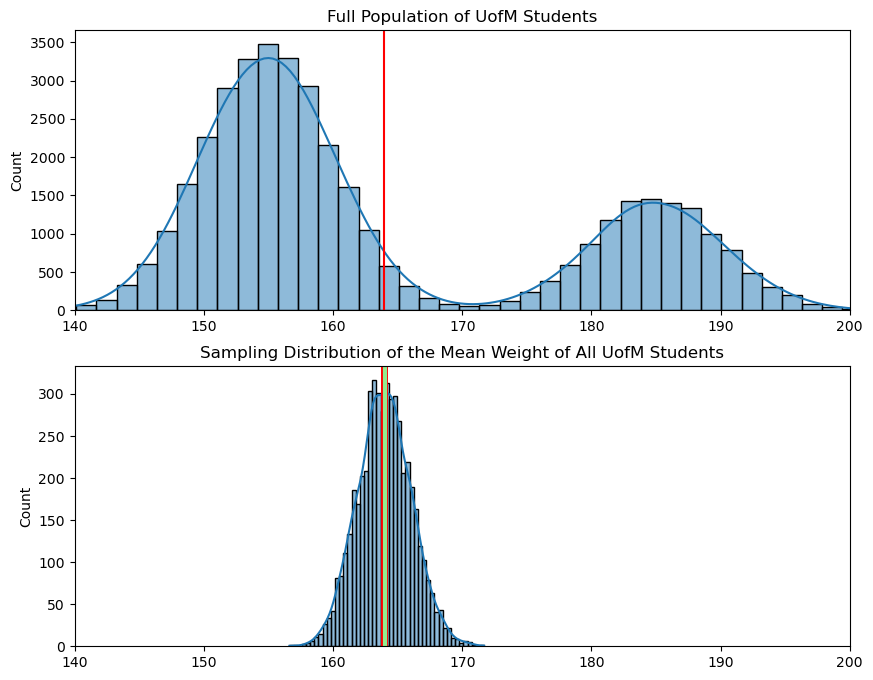

In [49]:
# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.histplot(population, kde=True)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population), color='r')
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.histplot(mean_distribution, kde=True)
plt.title("Sampling Distribution of the Mean Weight of All UofM Students")
plt.axvline(x = np.mean(population), color='r', lw=5)
plt.axvline(x = np.mean(mean_distribution), color = "lightgreen", lw=3)
plt.xlim([140,200])

plt.show()

## What Happens if We take a Non-Representative Sample?
What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

In [51]:
# Simulation parameters
sampSize = 3
numberSamps = 5000

In [52]:
# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(a=students_at_gym, size=sampSize)
    mean_distribution[i] = np.mean(random_students)
print(random_students)
print(len(mean_distribution))
mean_distribution

[182.10975637 183.57629161 187.60974975]
5000


array([186.03086473, 182.65427599, 184.84399228, ..., 184.76072725,
       184.98357513, 184.43193258])

<Figure size 1000x800 with 0 Axes>

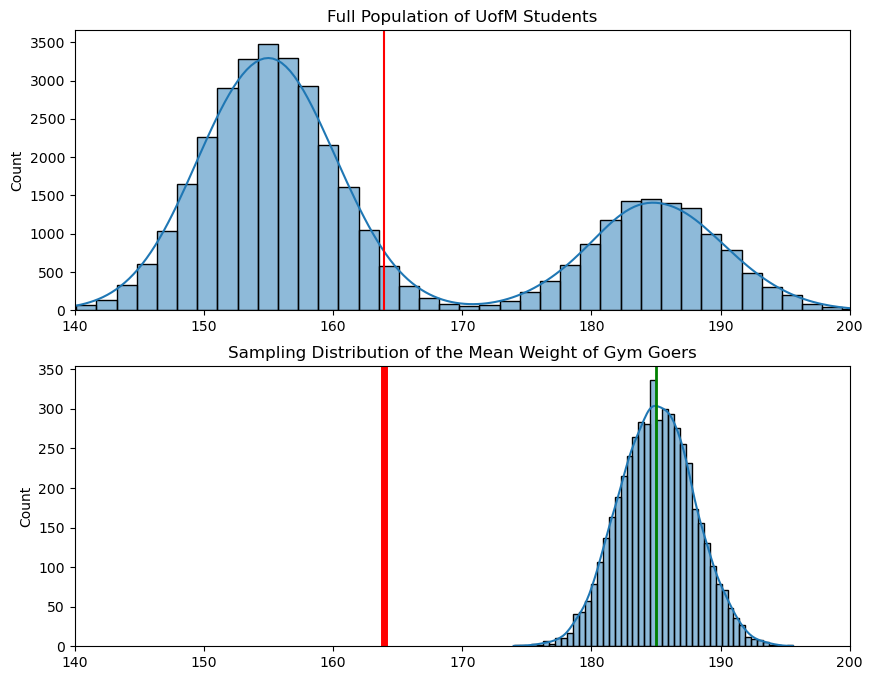

In [55]:
# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.histplot(population, kde=True)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population), color='r')
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.histplot(mean_distribution, kde=True)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population), color='r', lw=5)
plt.axvline(x = np.mean(students_at_gym), color = 'green', lw=2)
plt.xlim([140,200])

plt.show()